## Notebook 9: 

This is an IPython notebook. Most of the code is composed of bash scripts, indicated by %%bash at the top of the cell, otherwise it is IPython code. This notebook includes code to download, assemble and analyze a published RADseq data set.

In [14]:
### Notebook 9
### Data set 9 (Ohomopterus)
### Authors: Takahashi et al. 2014
### Data Location: DRP001067


## Download the sequence data
Sequence data for this study are archived on the NCBI sequence read archive (SRA). Below I read in SraRunTable.txt for this project which contains all of the information we need to download the data. 

+ Project DRA: DRA001025
+ Study: DRP001067
+ SRA link: http://trace.ddbj.nig.ac.jp/DRASearch/study?acc=DRP001067

In [15]:
%%bash
## make a new directory for this analysis
mkdir -p empirical_9/fastq/

#### For each ERS (individuals) get all of the ERR (sequence file accessions).

In [19]:
import os

def wget_download_ddbj(SRR, outdir):
    """ Python function to get sra data from ncbi and write to
    outdir with a new name using bash call wget """
    
    ## create a call string 
    call = "wget -q -r -nH --cut-dirs=9 -P "+outdir+" "+\
           "ftp://ftp.ddbj.nig.ac.jp/ddbj_database/dra/sra/ByExp/"+\
           "sra/DRX/DRX011/DRX011{:03d}".format(SRR)
    
    ## run wget call 
    ! $call

In [20]:
for ID in range(602,634):
    wget_download_ddbj(ID, "empirical_9/fastq/")

Here we pass the SRR number and the sample name to the `wget_download` function so that the files are saved with their sample names. 

In [21]:
%%bash
## convert sra files to fastq using fastq-dump tool
## output as gzipped into the fastq directory
fastq-dump --gzip -O empirical_9/fastq/ empirical_9/fastq/*.sra

## remove .sra files
rm empirical_9/fastq/*.sra

Read 10248198 spots for empirical_9/fastq/DRR021959.sra
Written 10248198 spots for empirical_9/fastq/DRR021959.sra
Read 7839034 spots for empirical_9/fastq/DRR021960.sra
Written 7839034 spots for empirical_9/fastq/DRR021960.sra
Read 1132781 spots for empirical_9/fastq/DRR021961.sra
Written 1132781 spots for empirical_9/fastq/DRR021961.sra
Read 2609632 spots for empirical_9/fastq/DRR021962.sra
Written 2609632 spots for empirical_9/fastq/DRR021962.sra
Read 5077478 spots for empirical_9/fastq/DRR021963.sra
Written 5077478 spots for empirical_9/fastq/DRR021963.sra
Read 5173478 spots for empirical_9/fastq/DRR021964.sra
Written 5173478 spots for empirical_9/fastq/DRR021964.sra
Read 2077912 spots for empirical_9/fastq/DRR021965.sra
Written 2077912 spots for empirical_9/fastq/DRR021965.sra
Read 4930613 spots for empirical_9/fastq/DRR021966.sra
Written 4930613 spots for empirical_9/fastq/DRR021966.sra
Read 2494972 spots for empirical_9/fastq/DRR021967.sra
Written 2494972 spots for empirical_9/f

In [22]:
%%bash
ls -lh empirical_9/fastq/

total 11G
-rw-rw-r-- 1 deren deren 801M Nov 28 18:32 DRR021959.fastq.gz
-rw-rw-r-- 1 deren deren 618M Nov 28 18:32 DRR021960.fastq.gz
-rw-rw-r-- 1 deren deren  91M Nov 28 18:32 DRR021961.fastq.gz
-rw-rw-r-- 1 deren deren 206M Nov 28 18:32 DRR021962.fastq.gz
-rw-rw-r-- 1 deren deren 399M Nov 28 18:32 DRR021963.fastq.gz
-rw-rw-r-- 1 deren deren 408M Nov 28 18:32 DRR021964.fastq.gz
-rw-rw-r-- 1 deren deren 167M Nov 28 18:32 DRR021965.fastq.gz
-rw-rw-r-- 1 deren deren 387M Nov 28 18:32 DRR021966.fastq.gz
-rw-rw-r-- 1 deren deren 197M Nov 28 18:32 DRR021967.fastq.gz
-rw-rw-r-- 1 deren deren 418M Nov 28 18:32 DRR021968.fastq.gz
-rw-rw-r-- 1 deren deren 499M Nov 28 18:32 DRR021969.fastq.gz
-rw-rw-r-- 1 deren deren 386M Nov 28 18:32 DRR021970.fastq.gz
-rw-rw-r-- 1 deren deren 8.4M Nov 28 18:32 DRR021971.fastq.gz
-rw-rw-r-- 1 deren deren 439M Nov 28 18:32 DRR021972.fastq.gz
-rw-rw-r-- 1 deren deren  70M Nov 28 18:32 DRR021973.fastq.gz
-rw-rw-r-- 1 deren deren 434M Nov 28 18:32 DRR021974.fastq.g

## Make a params file

In [23]:
%%bash
pyrad --version

pyRAD 3.0.63


In [24]:
%%bash
## remove old params file if it exists
rm params.txt 

## create a new default params file
pyrad -n 

	new params.txt file created


#### Note: 
The data here are from Illumina Casava <1.8, so the phred scores are offset by 64 instead of 33, so we use that in the params file below.

In [25]:
%%bash
## substitute new parameters into file
sed -i '/## 1. /c\empirical_9/           ## 1. working directory ' params.txt
sed -i '/## 6. /c\TGCAG                  ## 6. cutters ' params.txt
sed -i '/## 7. /c\20                     ## 7. N processors      ' params.txt
sed -i '/## 9. /c\6                      ## 9. NQual             ' params.txt
sed -i '/## 10./c\.85                    ## 10. clust threshold  ' params.txt
sed -i '/## 12./c\4                      ## 12. MinCov           ' params.txt
sed -i '/## 13./c\10                     ## 13. maxSH            ' params.txt
sed -i '/## 14./c\empirical_9_m4          ## 14. output name      ' params.txt
sed -i '/## 18./c\empirical_9/fastq/*.gz ## 18. data location    ' params.txt
sed -i '/## 29./c\2,2                    ## 29. trim overhang    ' params.txt
sed -i '/## 30./c\p,n,s                  ## 30. output formats   ' params.txt

In [26]:
cat params.txt

==** parameter inputs for pyRAD version 3.0.63  **======================== affected step ==
empirical_9/           ## 1. working directory 
./*.fastq.gz              ## 2. Loc. of non-demultiplexed files (if not line 18)  (s1)
./*.barcodes              ## 3. Loc. of barcode file (if not line 18)             (s1)
vsearch                   ## 4. command (or path) to call vsearch (or usearch)    (s3,s6)
muscle                    ## 5. command (or path) to call muscle                  (s3,s7)
TGCAG                  ## 6. cutters 
20                     ## 7. N processors      
6                         ## 8. Mindepth: min coverage for a cluster              (s4,s5)
6                      ## 9. NQual             
.85                    ## 10. clust threshold  
rad                       ## 11. Datatype: rad,gbs,pairgbs,pairddrad,(others:see docs)(all)
4                      ## 12. MinCov           
10                     ## 13. maxSH            
empirical_9_m4          ## 14. output name    

### Trimming the barcode
In this data set the data were uploaded separated by sample, but with the barcode still attached to the sequences. The python code below will remove the 5bp barcode from each sequence. 

In [9]:
os.path.splitext(fil)

('DRR021982.fastq', '.gz')

In [12]:
import glob
import itertools
import gzip
import os


for infile in glob.glob("empirical_9/fastq/DRR*"):
    iofile = gzip.open(infile, 'rb')
    dire, fil = os.path.split(infile)
    fastq = os.path.splitext(fil)[0]
    outhandle = os.path.join(dire, "T_"+fastq)
    outfile = open(outhandle, 'wb')
    
    data = iter(iofile)
    store = []
    while 1:
        try:
            line = data.next()
        except StopIteration:
            break
        if len(line) < 80:
            store.append(line)
        else:
            store.append(line[5:])
            
        if len(store) == 10000:
            outfile.write("".join(store))
            store = []
            
    iofile.close()
    outfile.close()        
    ! gzip $outhandle

## Assemble in _pyrad_


In [ ]:
%%bash
pyrad -p params.txt -s 234567 >> log.txt 2>&1  

In [13]:
%%bash
sed -i '/## 12./c\2                    ## 12. MinCov           ' params.txt
sed -i '/## 14./c\empirical_9_m2       ## 14. output name      ' params.txt

In [47]:
%%bash
pyrad -p params.txt -s 7 >> log.txt 2>&1  

## Results
We are interested in the relationship between the amount of input (raw) data between any two samples, the average coverage they recover when clustered together, and the phylogenetic distances separating samples.  

#### Raw data amounts
The average number of raw reads per sample is 1.36M.

In [1]:
import pandas as pd
import numpy as np

## read in the data
s2dat = pd.read_table("empirical_9/stats/s2.rawedit.txt", header=0, nrows=32)

## print summary stats
print s2dat["passed.total"].describe()

## find which sample has the most raw data
maxraw = s2dat["passed.total"].max()
print "\nmost raw data in sample:"
print s2dat['sample '][s2dat['passed.total']==maxraw]

count         32.000000
mean     3888871.375000
std      2913183.441258
min        98285.000000
25%      1000709.500000
50%      4518550.000000
75%      5558420.000000
max      9568142.000000
Name: passed.total, dtype: float64

most raw data in sample:
0    T_DRR021959
Name: sample , dtype: object


### Look at distributions of coverage
pyrad v.3.0.63 outputs depth information for each sample which I read in here and plot. First let's ask which sample has the highest depth of coverage. The std of coverages is pretty low in this data set compared to several others. 

In [3]:
## read in the s3 results
s9dat = pd.read_table("empirical_9/stats/s3.clusters.txt", header=0, nrows=33)

## print summary stats
print "summary of means\n=================="
print s9dat['dpt.me'].describe()

## print summary stats
print "\nsummary of std\n=================="
print s9dat['dpt.sd'].describe()

## print summary stats
print "\nsummary of proportion lowdepth\n=================="
print pd.Series(1-s9dat['d>5.tot']/s9dat["total"]).describe()

## find which sample has the greatest depth of retained loci
max_hiprop = (s9dat["d>5.tot"]/s9dat["total"]).max()
print "\nhighest coverage in sample:"
print s9dat['taxa'][s9dat['d>5.tot']/s9dat["total"]==max_hiprop]

summary of means
count     32.000000
mean      57.046781
std       37.276956
min        5.436000
25%       23.110250
50%       65.631000
75%       77.041000
max      135.646000
Name: dpt.me, dtype: float64

summary of std
count     32.000000
mean     272.580687
std      201.847071
min       16.346000
25%       94.865750
50%      258.018000
75%      399.662500
max      690.205000
Name: dpt.sd, dtype: float64

summary of proportion lowdepth
count    32.000000
mean      0.188730
std       0.161401
min       0.074257
25%       0.085030
50%       0.114366
75%       0.210204
max       0.655746
dtype: float64

highest coverage in sample:
7    T_DRR021966
Name: taxa, dtype: object


In [4]:
maxprop =(s9dat['d>5.tot']/s9dat['total']).max()
print "\nhighest prop coverage in sample:"
print s9dat['taxa'][s9dat['d>5.tot']/s9dat['total']==maxprop]


highest prop coverage in sample:
7    T_DRR021966
Name: taxa, dtype: object


In [5]:
## print mean and std of coverage for the highest coverage sample
with open("empirical_9/clust.85/T_DRR021966.depths", 'rb') as indat:
    depths = np.array(indat.read().strip().split(","), dtype=int)
    
print "Means for sample T_DRR021966"
print depths.mean(), depths.std()
print depths[depths>5].mean(), depths[depths>5].std()

Means for sample T_DRR021966
72.1266330292 439.779736427
77.7021948176 456.619346077


#### Plot the coverage for the sample with highest mean coverage
Green shows the loci that were discarded and orange the loci that were retained. The majority of data were discarded for being too low of coverage. 

In [8]:
import toyplot
import toyplot.svg
import numpy as np

## read in the depth information for this sample
with open("empirical_9/clust.85/T_DRR021966.depths", 'rb') as indat:
    depths = np.array(indat.read().strip().split(","), dtype=int)
    
## make a barplot in Toyplot
canvas = toyplot.Canvas(width=350, height=300)
axes = canvas.axes(xlabel="Depth of coverage (N reads)", 
                   ylabel="N loci", 
                   label="dataset9/sample=T_DRR021966")

## select the loci with depth > 5 (kept)
keeps = depths[depths>5]

## plot kept and discarded loci
edat = np.histogram(depths, range(30)) # density=True)
kdat = np.histogram(keeps, range(30)) #, density=True)
axes.bars(edat)
axes.bars(kdat)

#toyplot.svg.render(canvas, "empirical_9_depthplot.svg")

### Print final stats table

In [26]:
cat empirical_9/stats/empirical_9_m4.stats




76963       ## loci with > minsp containing data
76778       ## loci with > minsp containing data & paralogs removed
76778       ## loci with > minsp containing data & paralogs removed & final filtering

## number of loci recovered in final data set for each taxon.
taxon	nloci
T_DRR021959	40272
T_DRR021960	39500
T_DRR021961	29626
T_DRR021962	38304
T_DRR021963	40251
T_DRR021964	40440
T_DRR021965	37187
T_DRR021966	41059
T_DRR021967	38884
T_DRR021968	42626
T_DRR021969	43490
T_DRR021970	43303
T_DRR021971	5249
T_DRR021972	46589
T_DRR021973	29939
T_DRR021974	47628
T_DRR021975	46705
T_DRR021976	47963
T_DRR021977	47881
T_DRR021978	46731
T_DRR021979	46386
T_DRR021980	41322
T_DRR021981	8509
T_DRR021982	48193
T_DRR021983	47548
T_DRR021984	47715
T_DRR021985	27186
T_DRR021986	36910
T_DRR021987	6636
T_DRR021988	14945
T_DRR021989	6640
T_DRR021990	7699


## nloci = number of loci with data for exactly ntaxa
## ntotal = number of loci for which at least ntaxa have data
ntaxa	nloci	saved	ntotal
1	-
2	

In [9]:
%%bash
head -n 20 empirical_9/stats/empirical_9_m2.stats



119626      ## loci with > minsp containing data
119441      ## loci with > minsp containing data & paralogs removed
119441      ## loci with > minsp containing data & paralogs removed & final filtering

## number of loci recovered in final data set for each taxon.
taxon	nloci
T_DRR021959	45933
T_DRR021960	45128
T_DRR021961	33226
T_DRR021962	41997
T_DRR021963	45401
T_DRR021964	45882
T_DRR021965	40633
T_DRR021966	46239
T_DRR021967	43330
T_DRR021968	47995
T_DRR021969	47919
T_DRR021970	47490


## Infer ML phylogeny in _raxml_ as an unrooted tree

In [ ]:
%%bash
## raxml argumement w/ ...
raxmlHPC-PTHREADS-AVX -f a -m GTRGAMMA -N 100 -x 12345 -p 12345 -T 20 \
                      -w /home/deren/Documents/RADmissing/empirical_9/ \
                      -n empirical_9_m4 -s empirical_9/outfiles/empirical_9_m4.phy
                      

In [ ]:
%%bash
## raxml argumement w/ ...
raxmlHPC-PTHREADS-AVX -f a -m GTRGAMMA -N 100 -x 12345 -p 12345 -T 20 \
                      -w /home/deren/Documents/RADmissing/empirical_9/ \
                      -n empirical_9_m2 -s empirical_9/outfiles/empirical_9_m2.phy
                      

In [28]:
%%bash 
head -n 20 empirical_9/RAxML_info.empirical_9_m4



This is RAxML version 8.0.16 released by Alexandros Stamatakis on March 21 2014.

With greatly appreciated code contributions by:
Andre Aberer      (HITS)
Simon Berger      (HITS)
Alexey Kozlov     (HITS)
Nick Pattengale   (Sandia)
Wayne Pfeiffer    (SDSC)
Akifumi S. Tanabe (NRIFS)
David Dao         (KIT)
Charlie Taylor    (UF)


Alignment has 818110 distinct alignment patterns

Proportion of gaps and completely undetermined characters in this alignment: 54.64%

RAxML rapid bootstrapping and subsequent ML search


In [ ]:
%%bash 
head -n 20 empirical_9/RAxML_info.empirical_9_m2

### Plot the tree in R using `ape`


In [10]:
%load_ext rpy2.ipython

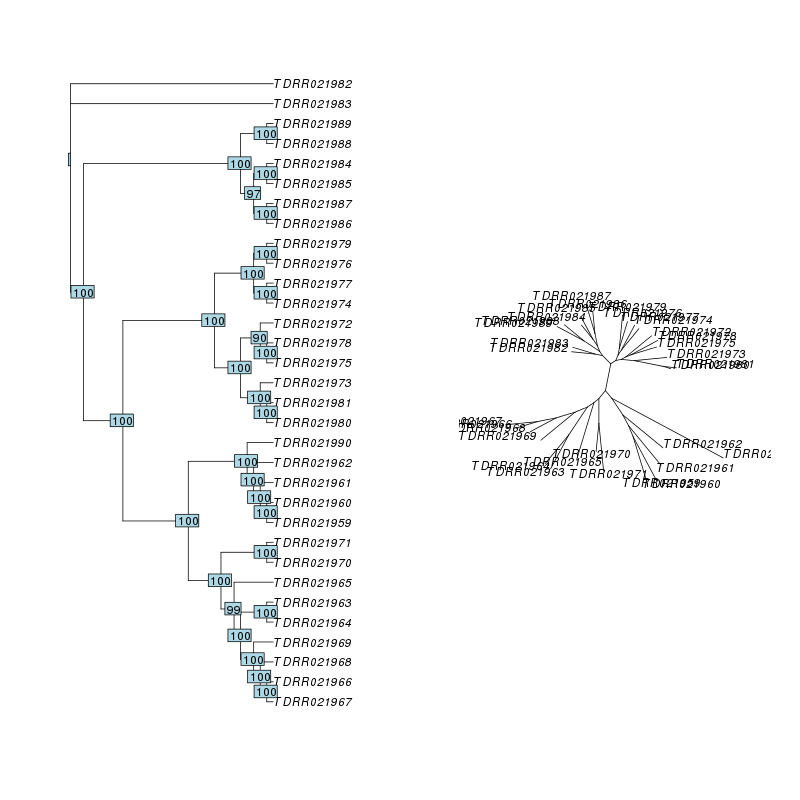

In [12]:
%%R -h 800 -w 800
library(ape)
tre <- read.tree("empirical_9/RAxML_bipartitions.empirical_9")
ltre <- ladderize(tre)

par(mfrow=c(1,2))
plot(ltre, use.edge.length=F)
nodelabels(ltre$node.label)

plot(ltre, type='u')

### Get phylo distances (GTRgamma dist)

In [13]:
%%R
mean(cophenetic.phylo(ltre))

[1] 0.04027079
